In [11]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from torch import nn
from torchtext.legacy import data
from tqdm import tqdm

from util import init_device, load_params
from util.mmd import run_test
from util.model import MMD, MyEmbedding, MyMLP
from util.nlp_preprocessing import dataframe2dataset, tokenizer_en, tokenizer_ja

GPU available: cuda
Loading parameters...
 ja_train_path:	 /workspace/data/dataset_ja_train.json
 ja_dev_path:	 /workspace/data/dataset_ja_dev.json
 ja_test_path:	 /workspace/data/dataset_ja_test.json
 en_train_path:	 /workspace/data/dataset_en_train.json
 en_dev_path:	 /workspace/data/dataset_en_dev.json
 en_test_path:	 /workspace/data/dataset_en_test.json
 ja_vector_path:	 /workspace/amazon_review/weight/japanese_fasttext_vectors.vec
 is_developing:	 True
 source_category:	 home
 target_category:	 wireless
 target_ratio:	 0.3
 lambda:	 7
 use_pretrained_vector:	 False
 token_max_length:	 256
 batch_size:	 32
 emb_dim:	 300
 class_num:	 2
 criterion:	 CrossEntropyLoss
 lr:	 1e-05
 optimizer:	 Adam
 epochs:	 10
Source num: 10000, Target num: 3000
Building data iterator...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  2%|▏         | 2/94 [00:00<00:06, 14.12it/s]


epoch 1 / 10


100%|██████████| 94/94 [00:05<00:00, 16.61it/s]


Loss -> Source: 0.710	Target: 0.695	MMD: 0.004	All: 5.483

Dev source Accuracy: 51.35
Dev source F1 Score: 33.36


  2%|▏         | 2/94 [00:00<00:05, 15.93it/s]


Dev target Accuracy: 60.85
Dev target F1 Score: 36.62

epoch 2 / 10


100%|██████████| 94/94 [00:05<00:00, 16.94it/s]


Loss -> Source: 0.644	Target: 0.570	MMD: 0.004	All: 3.888

Dev source Accuracy: 60.59
Dev source F1 Score: 35.32


  2%|▏         | 2/94 [00:00<00:05, 15.70it/s]


Dev target Accuracy: 60.41
Dev target F1 Score: 37.61

epoch 3 / 10


100%|██████████| 94/94 [00:05<00:00, 17.06it/s]


Loss -> Source: 0.597	Target: 0.467	MMD: 0.003	All: 3.382

Dev source Accuracy: 60.47
Dev source F1 Score: 37.21


  2%|▏         | 2/94 [00:00<00:05, 15.73it/s]


Dev target Accuracy: 63.18
Dev target F1 Score: 38.50

epoch 4 / 10


100%|██████████| 94/94 [00:05<00:00, 17.09it/s]


Loss -> Source: 0.541	Target: 0.363	MMD: 0.003	All: 3.054

Dev source Accuracy: 48.93
Dev source F1 Score: 30.73


  2%|▏         | 2/94 [00:00<00:06, 15.25it/s]


Dev target Accuracy: 62.38
Dev target F1 Score: 38.62

epoch 5 / 10


100%|██████████| 94/94 [00:05<00:00, 17.05it/s]


Loss -> Source: 0.498	Target: 0.292	MMD: 0.003	All: 2.925

Dev source Accuracy: 62.18
Dev source F1 Score: 38.13


  2%|▏         | 2/94 [00:00<00:05, 15.70it/s]


Dev target Accuracy: 64.91
Dev target F1 Score: 38.12

epoch 6 / 10


100%|██████████| 94/94 [00:05<00:00, 16.60it/s]


Loss -> Source: 0.454	Target: 0.232	MMD: 0.003	All: 2.755

Dev source Accuracy: 52.03
Dev source F1 Score: 32.18


  2%|▏         | 2/94 [00:00<00:05, 15.82it/s]


Dev target Accuracy: 60.71
Dev target F1 Score: 37.89

epoch 7 / 10


100%|██████████| 94/94 [00:05<00:00, 17.10it/s]


Loss -> Source: 0.399	Target: 0.200	MMD: 0.003	All: 2.669

Dev source Accuracy: 53.40
Dev source F1 Score: 33.04


  2%|▏         | 2/94 [00:00<00:05, 16.04it/s]


Dev target Accuracy: 63.83
Dev target F1 Score: 38.66

epoch 8 / 10


100%|██████████| 94/94 [00:05<00:00, 16.94it/s]


Loss -> Source: 0.378	Target: 0.168	MMD: 0.003	All: 2.549

Dev source Accuracy: 60.19
Dev source F1 Score: 37.20


  2%|▏         | 2/94 [00:00<00:06, 15.28it/s]


Dev target Accuracy: 59.73
Dev target F1 Score: 37.32

epoch 9 / 10


100%|██████████| 94/94 [00:05<00:00, 16.93it/s]


Loss -> Source: 0.345	Target: 0.149	MMD: 0.003	All: 2.471

Dev source Accuracy: 63.91
Dev source F1 Score: 38.35


  2%|▏         | 2/94 [00:00<00:05, 15.79it/s]


Dev target Accuracy: 49.76
Dev target F1 Score: 31.67

epoch 10 / 10


100%|██████████| 94/94 [00:05<00:00, 16.70it/s]


Loss -> Source: 0.319	Target: 0.125	MMD: 0.003	All: 2.392

Dev source Accuracy: 63.12
Dev source F1 Score: 37.65

Dev target Accuracy: 64.41
Dev target F1 Score: 38.40

Test source Accuracy: 63.97
Test source F1 Score: 37.72

Test target Accuracy: 63.85
Test target F1 Score: 38.11


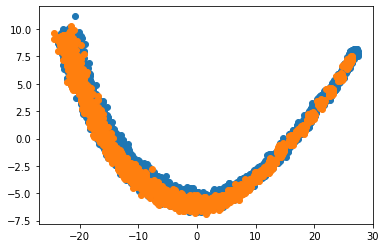

array([[2342,  658],
       [1152,  848]])

In [12]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
device = init_device()

print("Loading parameters...")
params = load_params("/workspace/amazon_review/config/params_mmd.json")

# データセット読み込み
train_source_df = pd.read_json(params["ja_train_path"], orient="record", lines=True)
if params["is_developing"]:
    train_source_df = train_source_df.sample(n=10000, random_state=1)
dev_source_df = pd.read_json(params["ja_dev_path"], orient="record", lines=True)
test_source_df = pd.read_json(params["ja_test_path"], orient="record", lines=True)
train_target_df = pd.read_json(params["en_train_path"], orient="record", lines=True)
if params["is_developing"]:
    train_target_df = train_target_df.sample(n=10000, random_state=1)
dev_target_df = pd.read_json(params["en_dev_path"], orient="record", lines=True)
test_target_df = pd.read_json(params["en_test_path"], orient="record", lines=True)

# targetドメインの割合を減らす
# targetの分類性能を下げるため
train_target_num = int(min(train_source_df.shape[0] * params["target_ratio"], train_target_df.shape[0]))
train_target_df = train_target_df.sample(train_target_num, replace=False)
print(f"Source num: {train_source_df.shape[0]}, Target num: {train_target_df.shape[0]}")

# クラスラベル設定
for df in [train_source_df, dev_source_df, test_source_df, train_target_df, dev_target_df, test_target_df]:
    # 3以上かを予測する場合
    df["class"] = 0
    df["class"][df["stars"] > 3] = 1

    # 5クラス分類する場合
    # df["class"] = df["stars"] - 1

# フィールド作成
print("Building data iterator...")
source_text_field = data.Field(
    sequential=True,
    tokenize=tokenizer_ja,
    use_vocab=True,
    lower=True,
    include_lengths=True,
    batch_first=True,
    fix_length=params["token_max_length"],
    init_token="<cls>",
    eos_token="<eos>",
)
target_text_field = data.Field(
    sequential=True,
    tokenize=tokenizer_en,
    use_vocab=True,
    lower=True,
    include_lengths=True,
    batch_first=True,
    fix_length=params["token_max_length"],
    init_token="<cls>",
    eos_token="<eos>",
)
label_field = data.Field(sequential=False, use_vocab=False)
ja_fields = [("text", source_text_field), ("label", label_field)]
en_fields = [("text", target_text_field), ("label", label_field)]

# データセット作成
columns = ["review_body", "class"]
train_source_dataset = dataframe2dataset(train_source_df, ja_fields, columns)
dev_source_dataset = dataframe2dataset(dev_source_df, ja_fields, columns)
test_source_dataset = dataframe2dataset(test_source_df, ja_fields, columns)
train_target_dataset = dataframe2dataset(train_target_df, en_fields, columns)
dev_target_dataset = dataframe2dataset(dev_target_df, en_fields, columns)
test_target_dataset = dataframe2dataset(test_target_df, en_fields, columns)

# embedding作成
source_text_field.build_vocab(train_source_dataset, min_freq=1)
target_text_field.build_vocab(train_target_dataset, min_freq=1)

# データローダー
# train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
dev_source_iter = data.BucketIterator(
    dataset=dev_source_dataset, batch_size=params["batch_size"], train=False, sort=False
)
test_source_iter = data.BucketIterator(
    dataset=test_source_dataset, batch_size=params["batch_size"], train=False, sort=False
)
train_target_iter = data.BucketIterator(dataset=train_target_dataset, batch_size=params["batch_size"], train=True)
dev_target_iter = data.BucketIterator(
    dataset=dev_target_dataset, batch_size=params["batch_size"], train=False, sort=False
)
test_target_iter = data.BucketIterator(
    dataset=test_target_dataset, batch_size=params["batch_size"], train=False, sort=False
)

# モデル構築
ja_v_size = len(source_text_field.vocab.stoi)
en_v_size = len(target_text_field.vocab.stoi)
source_embedding = MyEmbedding(params["emb_dim"], ja_v_size, params["token_max_length"]).to(device)
target_embedding = MyEmbedding(params["emb_dim"], en_v_size, params["token_max_length"]).to(device)
mlp = MyMLP(class_num=params["class_num"]).to(device)
criterion = getattr(nn, params["criterion"])()
mmd = MMD("rbf")

optimizer_s_emb = getattr(torch.optim, params["optimizer"])(source_embedding.parameters(), lr=params["lr"])
optimizer_t_emb = getattr(torch.optim, params["optimizer"])(target_embedding.parameters(), lr=params["lr"])
optimizer_mlp = getattr(torch.optim, params["optimizer"])(mlp.parameters(), lr=params["lr"])

split_ratio = len(train_target_dataset) / len(train_source_dataset)

# 訓練
for epoch in range(params["epochs"]):
    print(f"\nepoch {epoch+1} / {params['epochs']}")
    # 各lossの初期化
    total_source_loss = 0
    total_target_loss = 0
    total_mmd_loss = 0
    total_all_loss = 0

    # MMDのためにターゲットと同数のソースが必要なためエポックごとにソースのデータローダーを作成し直す
    # エポックごとに異なるソースのデータが使用されるようになる
    random.seed(epoch)
    train_source_subset, _ = train_source_dataset.split(split_ratio=split_ratio)
    train_source_iter = data.BucketIterator(
        dataset=train_source_subset, batch_size=params["batch_size"], train=True
    )

    for i, (source_batch, target_batch) in tqdm(
        enumerate(zip(train_source_iter, train_target_iter)), total=len(train_source_iter)
    ):
        source_embedding.train()
        target_embedding.train()
        mlp.train()

        source_x, source_y = source_batch.text[0].to(device), (source_batch.label).to(device)
        target_x, target_y = target_batch.text[0].to(device), (target_batch.label).to(device)

        # MMDの処理はBatch数が同数でなけらばならないためcontinueする
        # sourceとtargetで毎回同じBatch数だけデータがロードされる処理ができれば下の処理は不要
        if source_x.shape[0] != params["batch_size"] or target_x.shape[0] != params["batch_size"]:
            continue

        source_embed = source_embedding(source_x)
        source_pred = mlp(source_embed)
        source_loss = criterion(source_pred, source_y)
        total_source_loss += source_loss.cpu()

        target_embed = target_embedding(target_x)
        target_pred = mlp(target_embed)
        target_loss = criterion(target_pred, target_y)
        total_target_loss += target_loss.cpu()

        if params["lambda"] == 0:
            all_loss = source_loss + target_loss
        else:
            mmd_loss = mmd(source_embed, target_embed)
            total_mmd_loss = mmd_loss.cpu()
            all_loss = source_loss + target_loss + params["lambda"] * mmd_loss

        optimizer_s_emb.zero_grad()
        optimizer_t_emb.zero_grad()
        optimizer_mlp.zero_grad()

        all_loss.backward()

        optimizer_s_emb.step()
        optimizer_t_emb.step()
        optimizer_mlp.step()
        total_all_loss += all_loss.cpu()

    mean_source_loss = total_source_loss / len(train_source_iter)
    mean_target_loss = total_target_loss / len(train_target_iter)
    mean_all_loss = total_all_loss / len(train_source_iter)
    if params["lambda"] == 0:
        print(f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tAll: {mean_all_loss:.3f}")
    else:
        mean_mmd_loss = total_mmd_loss / len(train_source_iter)
        print(
            f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tMMD: {mean_mmd_loss:.3f}\tAll: {mean_all_loss:.3f}"  # noqa #E501
        )

    dev_source_accuracy, dev_source_f1 = run_test(source_embedding, mlp, dev_source_iter, device)
    print(f"\nDev source Accuracy: {dev_source_accuracy:.2f}")
    print(f"Dev source F1 Score: {dev_source_f1:.2f}")
    dev_target_accuracy, dev_target_f1 = run_test(target_embedding, mlp, dev_target_iter, device)
    print(f"\nDev target Accuracy: {dev_target_accuracy:.2f}")
    print(f"Dev target F1 Score: {dev_target_f1:.2f}")

test_source_accuracy, test_source_f1 = run_test(source_embedding, mlp, test_source_iter, device)
print(f"\nTest source Accuracy: {test_source_accuracy:.2f}")
print(f"Test source F1 Score: {test_source_f1:.2f}")
test_target_accuracy, test_target_f1 = run_test(target_embedding, mlp, test_target_iter, device)
print(f"\nTest target Accuracy: {test_target_accuracy:.2f}")
print(f"Test target F1 Score: {test_target_f1:.2f}")

# 特徴量可視化
source_embedding.eval()
target_embedding.eval()

train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
source_embedding_list = []
for batch in train_source_iter:
    x, _ = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = source_embedding(x)
    source_embedding_list.extend(embedding.cpu().numpy())
source_df = pd.DataFrame(np.array(source_embedding_list))

target_embedding_list = []
for batch in train_target_iter:
    x, _ = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = target_embedding(x)
    target_embedding_list.extend(embedding.cpu().numpy())
target_df = pd.DataFrame(np.array(target_embedding_list))

pca = PCA(n_components=2)
pca.fit(source_df)
source_pca_df = pca.transform(source_df)
target_pca_df = pca.transform(target_df)
source_pca_df.shape

plt.scatter(source_pca_df[:, 0], source_pca_df[:, 1])
plt.scatter(target_pca_df[:, 0], target_pca_df[:, 1])
plt.show()

label_list = []
pred_list = []
for batch in test_target_iter:
    x, y = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = target_embedding(x)
        pred = mlp(embedding)
    label_list.extend(list(y.cpu().numpy()))
    pred_list.extend(list(pred.cpu().numpy().argmax(1)))
confusion_matrix(label_list, pred_list)